# Pandas

ChatGPT-3 definindo Pandas, a partir do seguinte prompt: "defina pandas em um parágrafo, destacando sua importância para análise de dados"

>O pandas é uma poderosa biblioteca de Python amplamente utilizada na análise de dados. Sua importância reside na capacidade de simplificar e agilizar tarefas relacionadas à manipulação e exploração de dados tabulares, como planilhas ou tabelas de bancos de dados. Com o pandas, os analistas de dados podem facilmente importar, limpar, transformar, agregar e visualizar dados, permitindo uma compreensão mais profunda e insights valiosos a partir de conjuntos de dados complexos. Ao oferecer uma estrutura de dados flexível chamada DataFrame, o pandas se tornou uma ferramenta indispensável para cientistas de dados, analistas de negócios e pesquisadores em diversas áreas, contribuindo significativamente para a eficiência e qualidade das análises de dados.

DataFrames: são estruturas de dados tabulares semelhantes a tabelas de banco de dados ou planilhas do Excel.

## Instalando a biblioteca Pandas

```bash
pip install pandas
```

O `pip` é um gerenciador de pacotes do Python. Ele é usado para instalar e gerenciar pacotes de software escritos na linguagem Python.

Para saber mais sobre instalação e uso do pip, veja a lição "Instalação de Módulos Python com pip" de Fred Gibbs no [The Programming Historian](https://programminghistorian.org/pt/licoes/instalacao-modulos-python-pip).

## Importando a biblioteca Pandas

Para utilizar a biblioteca Pandas, é preciso importá-la no seu código. Para isso, basta usar o comando `import` seguido do nome da biblioteca:

In [1]:
import pandas as pd

## Criando um *Dataframe* a partir de um dicionário

```python
df = pd.DataFrame(<seus dados aqui>)
```

Para criar um objeto DataFrame, basta passar seus dados como argumento para a função `pd.DataFrame()`. Lembrando que `pd` é o alias (*apelidinho*) que utilizamos para importar a biblioteca pandas.

No exemplo abaixo, vamos criar um dicionário com três chaves: 'A', 'B' e 'C'. Cada chave possui uma lista com cinco valores inteiros. 
    
Em seguida, vamos criar um DataFrame a partir do dicionário.

In [2]:
# criando uma variável para receber o dicionário
dados = {'A': [1,2,3,4,5],
         'B': [6,7,8,9,10],
         'C': [0,10,100,1000,10000]}

In [3]:
type(dados)

dict

Um dicionário no Python é uma estrutura de dados que armazena pares de chave-valor. Em python, definimos um dicionário utilizando chaves {} e separando cada par chave-valor com dois pontos. Cada chave é associada a um valor, que pode ser um número, uma string, uma lista, um dicionário, etc.


In [4]:
dicionario = {
    'Nomes': ['João', 'Maria', 'José', 'Pedro'],
    'Idades': [25, 30, 40, 50],
    'Cidades': ['Manaus', 'Rio de Janeiro', 'Salvador', 'Salvador']
}

In [5]:
dicionario.keys()

dict_keys(['Nomes', 'Idades', 'Cidades'])

In [6]:
dicionario.values()


dict_values([['João', 'Maria', 'José', 'Pedro'], [25, 30, 40, 50], ['Manaus', 'Rio de Janeiro', 'Salvador', 'Salvador']])

In [7]:
dicionario['Nomes']

['João', 'Maria', 'José', 'Pedro']

In [8]:
dicionario['Idades']

[25, 30, 40, 50]

In [9]:
dicionario['Cidades']

['Manaus', 'Rio de Janeiro', 'Salvador', 'Salvador']


No exemplo acima, o dicionário possui três chaves: 'Nomes', 'Idades' e 'Cidades'. Cada chave é associada a uma lista de valores.

Se passarmos esse dicionário como argumento para a função `pd.DataFrame()`, o pandas irá criar um DataFrame com três colunas (a partir das chaves) e cinco linhas (a partir dos valores).

In [10]:
# Criar um dataframe
df = pd.DataFrame(dicionario)

## Informações gerais sobre o DataFrame

Vamos começar com o exemplo simples do DataFrame criado a partir do dicionário de nomes, idades e cidades.

Antes de explorar os dados de forma mais aprofundada, vamos verificar algumas informações gerais sobre o DataFrame.

### Primeiras linhas


In [11]:
df.head()

,Nomes,Idades,Cidades
0,João,25,Manaus
1,Maria,30,Rio de Janeiro
2,José,40,Salvador
3,Pedro,50,Salvador


### Últimas linhas


In [12]:
df.tail()

,Nomes,Idades,Cidades
0,João,25,Manaus
1,Maria,30,Rio de Janeiro
2,José,40,Salvador
3,Pedro,50,Salvador


### Mostrar a forma do dataframe (linhas, colunas)


In [13]:
df.shape

(4, 3)

### Descrição estatística do dataframe


In [14]:
df.describe()

,Idades
count,4.000000
mean,36.250000
std,11.086779
min,25.000000
25%,28.750000
50%,35.000000
75%,42.500000
max,50.000000


### Informações completas do dataframe


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nomes    4 non-null      object
 1   Idades   4 non-null      int64 
 2   Cidades  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


### Mostrar colunas


In [16]:
df.columns

Index(['Nomes', 'Idades', 'Cidades'], dtype='object')

## Manipulando DataFrames

### Renomear colunas


In [17]:
df.rename(columns={'Nomes': 'nome', 'Idades': 'idade', 'Cidades': 'cidade'}, inplace=True)

In [18]:
df

,nome,idade,cidade
0,João,25,Manaus
1,Maria,30,Rio de Janeiro
2,José,40,Salvador
3,Pedro,50,Salvador


### Adicionar colunas


In [20]:
df['nota'] = [9.5, 4.0, 8.8, 3.0]
df

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0


In [21]:
df['id'] = [1, 2, 3, 4]
df

,nome,idade,cidade,nota,id
0,João,25,Manaus,9.5,1
1,Maria,30,Rio de Janeiro,4.0,2
2,José,40,Salvador,8.8,3
3,Pedro,50,Salvador,3.0,4


### Deletar uma coluna


In [22]:
df.drop('id', axis=1, inplace=True)
df

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0


### Incluir um linha

In [23]:
# incluir Pedro ao final do dataframe
df.loc[4] = ['Pedro', 50, 'Salvador', 3.0]

In [24]:
df

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0
4,Pedro,50,Salvador,3.0


In [25]:
df.loc[0] = ['Pedro', 50, 'Salvador', 3.0]
df

,nome,idade,cidade,nota
0,Pedro,50,Salvador,3.0
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0
4,Pedro,50,Salvador,3.0


In [26]:
df.loc[0] = ['João', 25, 'Manaus', 9.5]
df

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0
4,Pedro,50,Salvador,3.0


### Excluir uma linha pelo índice

In [27]:
df.drop(4, axis=0, inplace=True)

In [28]:
df

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0


É possível excluir várias linhas de uma vez, passando uma lista de índices para a função `drop()`.

```python
df.drop([1,2,3], axis=0, inplace=True)
```

## Concatenando DataFrames

Para isso usamos a função `pd.concat()`.

In [30]:
novo_dict = {
    'Nomes': ['Luiza', 'Carolina', 'Vitor', 'Gabriel'],
    'Idades': [20, 20, 22, 31],
    'Cidades': ['Manaus', 'Rio de Janeiro', 'Salvador', 'Salvador']
}

In [35]:
df2 = pd.DataFrame(novo_dict)


In [32]:
# concatenar dataframes
df_concat = pd.concat([df, df2])


In [33]:
df_concat

,nome,idade,cidade,nota,Nomes,Idades,Cidades
0,João,25.0,Manaus,9.5,NaN,NaN,NaN
1,Maria,30.0,Rio de Janeiro,4.0,NaN,NaN,NaN
2,José,40.0,Salvador,8.8,NaN,NaN,NaN
3,Pedro,50.0,Salvador,3.0,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Luiza,20.0,Manaus
1,NaN,NaN,NaN,NaN,Carolina,20.0,Rio de Janeiro
2,NaN,NaN,NaN,NaN,Vitor,22.0,Salvador
3,NaN,NaN,NaN,NaN,Gabriel,31.0,Salvador


É importante avaliar os nomes das colunas e o índice dos dataframes que serão concatenados. Se os nomes das colunas forem diferentes, o pandas irá criar novas colunas. Se os índices forem diferentes, o pandas irá criar novas linhas (com valores NaN).

In [34]:
df.columns

Index(['nome', 'idade', 'cidade', 'nota'], dtype='object')

In [36]:
df2.columns

Index(['Nomes', 'Idades', 'Cidades'], dtype='object')

In [37]:
df2.rename(columns={'Nomes': 'nome', 'Idades': 'idade', 'Cidades': 'cidade'}, inplace=True)
df2.columns

Index(['nome', 'idade', 'cidade'], dtype='object')

In [42]:
df_concat = pd.concat([df, df2])
df_concat

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
1,Maria,30,Rio de Janeiro,4.0
2,José,40,Salvador,8.8
3,Pedro,50,Salvador,3.0
0,Luiza,20,Manaus,NaN
1,Carolina,20,Rio de Janeiro,NaN
2,Vitor,22,Salvador,NaN
3,Gabriel,31,Salvador,NaN


In [43]:
df_concat.loc[0]

,nome,idade,cidade,nota
0,João,25,Manaus,9.5
0,Luiza,20,Manaus,NaN


### Resetar o index após a concatenação


In [44]:
# resetar o index e remover o antigo
df_concat.reset_index(inplace=True)
df_concat

,index,nome,idade,cidade,nota
0,0,João,25,Manaus,9.5
1,1,Maria,30,Rio de Janeiro,4.0
2,2,José,40,Salvador,8.8
3,3,Pedro,50,Salvador,3.0
4,0,Luiza,20,Manaus,NaN
5,1,Carolina,20,Rio de Janeiro,NaN
6,2,Vitor,22,Salvador,NaN
7,3,Gabriel,31,Salvador,NaN


In [48]:
df_concat.loc[0]

index          0
nome        João
idade         25
cidade    Manaus
nota         9.5
Name: 0, dtype: object

In [50]:
# remover a coluna `index` para 'index original'
df_concat.rename(columns={'index': 'index_original'}, inplace=True)
df_concat

,index_original,nome,idade,cidade,nota
0,0,João,25,Manaus,9.5
1,1,Maria,30,Rio de Janeiro,4.0
2,2,José,40,Salvador,8.8
3,3,Pedro,50,Salvador,3.0
4,0,Luiza,20,Manaus,NaN
5,1,Carolina,20,Rio de Janeiro,NaN
6,2,Vitor,22,Salvador,NaN
7,3,Gabriel,31,Salvador,NaN


### NaN - Not a Number - valores ausentes


In [51]:
# média das notas
df_concat['nota'].mean()

6.325

In [55]:
# Verificar se há valores nulos
df_concat['nota'].isnull()


0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
Name: nota, dtype: bool

In [56]:
# preencher valores ausentes
df_concat.fillna(0, inplace=True)
df_concat

,index_original,nome,idade,cidade,nota
0,0,João,25,Manaus,9.5
1,1,Maria,30,Rio de Janeiro,4.0
2,2,José,40,Salvador,8.8
3,3,Pedro,50,Salvador,3.0
4,0,Luiza,20,Manaus,0.0
5,1,Carolina,20,Rio de Janeiro,0.0
6,2,Vitor,22,Salvador,0.0
7,3,Gabriel,31,Salvador,0.0


Também é possível deletar linhas que possuem valores NaN em uma coluna específica.

```python
#drop NAN values
df.dropna(inplace=True)
```

### Trabalhando com números inteiros e floats

In [58]:
# Encontrar o maior valor da coluna `nota`
df_concat['nota'].max()


9.5

In [60]:
#  Encontrar o menor valor da coluna `nota`
print(df_concat['nota'].min())

0.0


In [59]:
# Encontrar a média da coluna `nota`
print(df_concat['nota'].mean())


3.1625


In [62]:
# Encontrar a mediana da coluna `nota`
print(df_concat['nota'].median())

1.5


## Contar valores únicos em uma coluna

In [64]:
# Contar a quantidade de valores da coluna `nota`
df_concat['nota'].value_counts()

0.0    4
9.5    1
4.0    1
8.8    1
3.0    1
Name: nota, dtype: int64

## Iterar nas linhas de um DataFrame: `iterrows()`

Iterar nas linhas da coluna `nota` e imprimir apenas as notas maiores que 7.

In [65]:
# iterar nas linhas e imprimir apenas notas maiores do que 7
for index, row in df_concat.iterrows():
    if row['nota'] > 7:
        print(row['nome'], row['nota'])

João 9.5
José 8.8


### query()

E se quisermos iterar nas linhas e criar um novo DataFrame apenas com as linhas que possuem notas menores que 7?

In [70]:
# iterar nas linhas e criar um 
# novo dataframe com as notas menores do que 7
lista = []
for index, row in df_concat.iterrows():
    if row['nota'] < 7:
        lista.append(row)

df_novo = pd.DataFrame(lista)
df_novo

,index_original,nome,idade,cidade,nota
1,1,Maria,30,Rio de Janeiro,4.0
3,3,Pedro,50,Salvador,3.0
4,0,Luiza,20,Manaus,0.0
5,1,Carolina,20,Rio de Janeiro,0.0
6,2,Vitor,22,Salvador,0.0
7,3,Gabriel,31,Salvador,0.0


Há um jeito mais fácil de fazer isso: usando o método `query()`.

In [71]:
df_novo = df_concat.query('nota < 7')
df_novo

,index_original,nome,idade,cidade,nota
1,1,Maria,30,Rio de Janeiro,4.0
3,3,Pedro,50,Salvador,3.0
4,0,Luiza,20,Manaus,0.0
5,1,Carolina,20,Rio de Janeiro,0.0
6,2,Vitor,22,Salvador,0.0
7,3,Gabriel,31,Salvador,0.0


## Agrupando valores para análise

In [72]:
df_concat.groupby('cidade')

In [80]:
# group by a column and count the number of occurrences
df_concat.groupby(by=['nota']).count()

,index_original,nome,idade,cidade
nota,,,,
0.0,4,4,4,4
3.0,1,1,1,1
4.0,1,1,1,1
8.8,1,1,1,1
9.5,1,1,1,1


In [84]:
#Avaliar quais cidades tiveram mais notas maiores que 7 a partir do dataframe `df`.
df_concat.query('nota > 7').groupby('cidade').count()


,index_original,nome,idade,nota
cidade,,,,
Manaus,1,1,1,1
Salvador,1,1,1,1


## apply(): aplicar uma função a uma coluna

Vamos tentar incluir uma coluna 'resultado'. 

- Se a nota for igual ou maior que 7, o resultado é aprovado',
- Se for entre 5 e 6.9, o resultado é 'recuperação',
- Sse for menor que 5, o resultado é 'reprovado'

In [85]:
def calcular_resultado(nota):
    """
    Recebe uma nota e retorna o resultado do aluno com base na nota.
    """
    if nota >= 7:
        return 'aprovado'
    elif nota >= 5 and nota < 7:
        return 'recuperação'
    else:
        return 'reprovado'


In [86]:
# método apply: aplica uma função a cada linha do dataframe
df_concat['resultado'] = df_concat['nota'].apply(calcular_resultado)
df_concat

,index_original,nome,idade,cidade,nota,resultado
0,0,João,25,Manaus,9.5,aprovado
1,1,Maria,30,Rio de Janeiro,4.0,reprovado
2,2,José,40,Salvador,8.8,aprovado
3,3,Pedro,50,Salvador,3.0,reprovado
4,0,Luiza,20,Manaus,0.0,reprovado
5,1,Carolina,20,Rio de Janeiro,0.0,reprovado
6,2,Vitor,22,Salvador,0.0,reprovado
7,3,Gabriel,31,Salvador,0.0,reprovado


Mesma coisa com uma função lambda (que é uma função anônima e não vamos nos aprofundar nisso agora):

```python
df['resultado'] = df['nota'].apply(lambda x: 'aprovado' if x >= 7 else ('recuperação' if x >= 5 and x < 7 else 'reprovado'))
```

## Salvando um DataFrame em um arquivo

Podemos salvar nosso DataFrame em arquivos com diferentes formatos: csv, excel, json, html, etc.

Veja a tabela com alguns formatos e os métodos de salvar:

|Formato|Salvar com|
|---|---|
|csv|`df.to_csv('nome_do_arquivo.csv')`|
|json|`df.to_json('nome_do_arquivo.json')`|
|html|`df.to_html('nome_do_arquivo.html')`|


In [88]:
# salvar o dataframe em um arquivo csv apenas com as colunas nome, nota e resultado
df_concat[['nome', 'nota', 'resultado']].to_csv('resultado.csv', index=False)


In [89]:
# salvar em json com utf-8
df_concat[['nome', 'nota', 'resultado']].to_json('resultado.json', orient='records', force_ascii=False)


In [ ]:
df_concat[['nome', 'nota', 'resultado']].to_html('resultado.html', index=False)

Na célula acima, utilizamos df_concat[[]] retorna um novo dataframe.

# Analisando dados na prática

Exemplo com dados da HDB.

Aqui veremos um exemplo com um dataset mais complexo, com 69 linhas e 8 colunas. 

Esse dataset é resultado da utilização da ferramenta pyHDB, uma ferramenta de auxílio metodológico para a pesquisa na Hemeroteca Digital Brasileira da Biblioteca Nacional.

A ferramenta foi desenvolvida por mim e está disponível no GitHub: https://ericbrasiln.github.io/pyHDB/.

Para mais informações sobre seus usos e aspectos teóricos e metodológicos de seu desenvolvimento veja o artigo [pyHDB - Ferramenta Heurística para a Hemeroteca Digital Brasileira: utilizando técnicas de web scraping para a pesquisa em História](https://www.historiadahistoriografia.com.br/revista/article/view/1904) publicano na Revista História da Historiografia.

Ao invés de criar um dataframe a partir de um dicionário como fizemos anteriormente, vamos criar um dataframe a partir de um arquivo CSV.

O CSV (*Comma Separated Values*) é um formato de arquivo que armazena dados tabulares em texto simples. 

Cada linha do arquivo de texto é uma linha da tabela e as colunas são separadas por vírgulas. Esses arquivos podem ser abertos em qualquer editor de texto ou planilha.

Para criar um dataframe a partir de um arquivo CSV, basta utilizar a função `pd.read_csv()` e passar o caminho do arquivo como argumento.

Também é possível criar um dataframe a partir de um arquivo Excel, utilizando a função `pd.read_excel()`.

Antes de analisarmos nossos dados com o pandas, vamos dar uma olhada no arquivo CSV em um editor de planilhas comum.

In [90]:
df_hdb = pd.read_csv('./assets/moyses-zacharias_2023-09-13_14-52-48.csv')

In [91]:
df_hdb.head()

,Unnamed: 0,Termo da busca,Data da Busca,Acervo,Ano,Edição,Página,Nome do arquivo,Link
0,0,"""moyses zacharias""",2023-09-13,O Malho (RJ) - 1902 - 1953,1908,91,15,116300_11226.jpg,http://memoria.bn.br/docreader/116300/11226
1,1,"""moyses zacharias""",2023-09-13,O Malho (RJ) - 1902 - 1953,1911,54,20,116300_18886.jpg,http://memoria.bn.br/docreader/116300/18886
2,2,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,112,3,089842_02_213.jpg,http://memoria.bn.br/docreader/089842_02/213
3,3,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,125,2,089842_02_332.jpg,http://memoria.bn.br/docreader/089842_02/332
4,4,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,140,4,089842_02_462.jpg,http://memoria.bn.br/docreader/089842_02/462


In [92]:
df_hdb = pd.read_csv('./assets/moyses-zacharias_2023-09-13_14-52-48.csv', index_col=0)


In [93]:
df_hdb.head(10)

,Termo da busca,Data da Busca,Acervo,Ano,Edição,Página,Nome do arquivo,Link
0,"""moyses zacharias""",2023-09-13,O Malho (RJ) - 1902 - 1953,1908,91,15,116300_11226.jpg,http://memoria.bn.br/docreader/116300/11226
1,"""moyses zacharias""",2023-09-13,O Malho (RJ) - 1902 - 1953,1911,54,20,116300_18886.jpg,http://memoria.bn.br/docreader/116300/18886
2,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,112,3,089842_02_213.jpg,http://memoria.bn.br/docreader/089842_02/213
3,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,125,2,089842_02_332.jpg,http://memoria.bn.br/docreader/089842_02/332
4,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,140,4,089842_02_462.jpg,http://memoria.bn.br/docreader/089842_02/462
5,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1910,143,1,089842_02_491.jpg,http://memoria.bn.br/docreader/089842_02/491
6,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1911,575,3,089842_02_4730.jpg,http://memoria.bn.br/docreader/089842_02/4730
7,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1911,586,3,089842_02_4844.jpg,http://memoria.bn.br/docreader/089842_02/4844
8,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1910 a 1919,1916,194,3,089842_02_26864.jpg,http://memoria.bn.br/docreader/089842_02/26864
9,"""moyses zacharias""",2023-09-13,Gazeta de Noticias (RJ) - 1900 a 1919,1904,111,2,103730_04_7508.jpg,http://memoria.bn.br/docreader/103730_04/7508


In [94]:
df_hdb.tail(10)

,Termo da busca,Data da Busca,Acervo,Ano,Edição,Página,Nome do arquivo,Link
59,"""moyses zacharias""",2023-09-13,O Paiz (RJ) - 1910 a 1919,1911,784,2,178691_04_7627.jpg,http://memoria.bn.br/docreader/178691_04/7627
60,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1901 a 1909,1906,719,3,089842_01_10241.jpg,http://memoria.bn.br/docreader/089842_01/10241
61,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1901 a 1909,1909,1,1,089842_01_21042.jpg,http://memoria.bn.br/docreader/089842_01/21042
62,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1901 a 1909,1909,40,3,089842_01_21382.jpg,http://memoria.bn.br/docreader/089842_01/21382
63,"""moyses zacharias""",2023-09-13,Correio da Manhã (RJ) - 1901 a 1909,1909,87,1,089842_01_21802.jpg,http://memoria.bn.br/docreader/089842_01/21802
64,"""moyses zacharias""",2023-09-13,A Noite (RJ) - 1930 a 1939,1939,752,18,348970_03_62607.jpg,http://memoria.bn.br/docreader/348970_03/62607
65,"""moyses zacharias""",2023-09-13,A Noite (RJ) - 1930 a 1939,1939,752,28,348970_03_62617.jpg,http://memoria.bn.br/docreader/348970_03/62617
66,"""moyses zacharias""",2023-09-13,O Imparcial : Diario Illustrado do Rio de Jane...,1915,758,11,107670_01_9429.jpg,http://memoria.bn.br/docreader/107670_01/9429
67,"""moyses zacharias""",2023-09-13,O Imparcial : Diario Illustrado do Rio de Jane...,1915,759,9,107670_01_9443.jpg,http://memoria.bn.br/docreader/107670_01/9443
68,"""moyses zacharias""",2023-09-13,Diario Carioca : O máximo de jornal no mínimo...,1960,704,2,093092_05_746.jpg,http://memoria.bn.br/docreader/093092_05/746


In [95]:
# print column names
df_hdb.columns

Index(['Termo da busca', 'Data da Busca', 'Acervo', 'Ano', 'Edição', 'Página',
       'Nome do arquivo', 'Link'],
      dtype='object')

In [96]:
df_hdb.shape

(69, 8)

In [97]:
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Termo da busca   69 non-null     object
 1   Data da Busca    69 non-null     object
 2   Acervo           69 non-null     object
 3   Ano              69 non-null     int64 
 4   Edição           69 non-null     int64 
 5   Página           69 non-null     int64 
 6   Nome do arquivo  60 non-null     object
 7   Link             69 non-null     object
dtypes: int64(3), object(5)
memory usage: 4.9+ KB


In [98]:
df_hdb['Acervo'][:20]

0                O Malho (RJ) - 1902 - 1953
1                O Malho (RJ) - 1902 - 1953
2       Correio da Manhã (RJ) - 1910 a 1919
3       Correio da Manhã (RJ) - 1910 a 1919
4       Correio da Manhã (RJ) - 1910 a 1919
5       Correio da Manhã (RJ) - 1910 a 1919
6       Correio da Manhã (RJ) - 1910 a 1919
7       Correio da Manhã (RJ) - 1910 a 1919
8       Correio da Manhã (RJ) - 1910 a 1919
9     Gazeta de Noticias (RJ) - 1900 a 1919
10    Gazeta de Noticias (RJ) - 1900 a 1919
11    Gazeta de Noticias (RJ) - 1900 a 1919
12    Gazeta de Noticias (RJ) - 1900 a 1919
13    Gazeta de Noticias (RJ) - 1900 a 1919
14    Gazeta de Noticias (RJ) - 1900 a 1919
15    Gazeta de Noticias (RJ) - 1900 a 1919
16    Gazeta de Noticias (RJ) - 1900 a 1919
17    Gazeta de Noticias (RJ) - 1900 a 1919
18    Gazeta de Noticias (RJ) - 1900 a 1919
19    Gazeta de Noticias (RJ) - 1900 a 1919
Name: Acervo, dtype: object

In [99]:
# group by column 'Acervo'
gb_acervo = df_hdb.groupby('Acervo')
gb_acervo

In [100]:
# count the number of occurrences and sort by descending order
gb_acervo.size()

Acervo
A Epoca (RJ) - 1912 a 1919                                                      3
A Imprensa (RJ) - 1898 a 1914                                                   2
A Noite (RJ) - 1911 a 1919                                                      1
A Noite (RJ) - 1920 a 1929                                                      1
A Noite (RJ) - 1930 a 1939                                                      2
A Noticia (RJ) - 1894 a 1916                                                    2
A Rua : Semanario Illustrado (RJ) - 1910 a 1927                                 1
A União (RJ) - 1905 a 1950                                                      1
Correio da Manhã (RJ) - 1901 a 1909                                             4
Correio da Manhã (RJ) - 1910 a 1919                                             7
Correio da Manhã (RJ) - 1920 a 1929                                             2
Correio da Manhã (RJ) - 1936 a 1939                                             1
Diario Ca

In [101]:
gb_acervo.size().sort_values(ascending=False)

Acervo
Gazeta de Noticias (RJ) - 1900 a 1919                                          13
Correio da Manhã (RJ) - 1910 a 1919                                             7
O Seculo (RJ) - 1906 a 1916                                                     5
Correio da Manhã (RJ) - 1901 a 1909                                             4
A Epoca (RJ) - 1912 a 1919                                                      3
O Paiz (RJ) - 1920 a 1929                                                       3
Jornal do Commercio (RJ) - 1910 a 1919                                          3
Jornal do Brasil (RJ) - 1900 a 1909                                             3
O Imparcial (RJ) - 1920 a 1929                                                  2
O Malho (RJ) - 1902 - 1953                                                      2
Correio da Manhã (RJ) - 1920 a 1929                                             2
O Radical (RJ) - 1932 a 1943                                                    2
A Noticia

Para fazermos uma análise mais completa dos dados, precisamos excluir o padrão '- XXXX a XXXX' e manter apenas o nome do jornal na coluna 'Acervo'. 

Mas como faremos isso? um por um?

Vamos usar expressões regulares! E pedir uma ajudinha ao ChatGPT-3.

## Expressões regulares

Expressões regulares são padrões utilizados para selecionar combinações de caracteres em uma string. Tudo é possível com expressões regulares, mas ao mesmo tempo elas podem ser bem complicadas.

Veja a lição [Understanding Regular Expressions](http://programminghistorian.org/en/lessons/understanding-regular-expressions) de Doug Knox no Programming Historian para saber mais sobre expressões regulares. Ela ainda está em inglês (e se alguém quiser traduzir para publicarmos em português, será muito bem-vindo e só entrar em contato comigo!).

Prompt para o ChatGPT-3.5:

>Escreva uma expressão regular para selecionar o padrão '- XXXX a XXXX'. O XXXX corresponde a um ano de quatro dígitos.

Essa foi a resposta que o ChatGPT-3.5 me deu:

---
Você pode usar a seguinte expressão regular para selecionar o padrão "- XXXX a XXXX", onde XXXX representa um ano de quatro dígitos:

```regex
-\s\d{4}\s+a\s+\d{4}
```

Aqui está uma breve explicação da expressão regular:

- `-\s`: Isso corresponde ao caractere "-" seguido de um espaço em branco.
- `\d{4}`: Isso corresponde a quatro dígitos consecutivos, que representam um ano de quatro dígitos.
- `\s+a\s+`: Isso corresponde a um ou mais espaços em branco, seguidos pela letra "a" em minúsculas e mais um ou mais espaços em branco.
- `\d{4}`: Isso corresponde novamente a quatro dígitos consecutivos para o segundo ano de quatro dígitos.

Essa expressão regular capturará padrões como "- 2021 a 2022", onde "2021" e "2022" são anos de quatro dígitos separados pelo texto "a".


In [102]:
# use re to find the pattern and replace it with a new string
df_hdb['Acervo'] = df_hdb['Acervo'].str.replace(' -\s\d{4}\s+a\s+\d{4}', '', regex=True)


In [103]:
df_hdb['Acervo'] = df_hdb['Acervo'].str.replace(' -\s\d{4}', '', regex=True)

In [104]:
df_hdb['Acervo']

0                                          O Malho (RJ)
1                                          O Malho (RJ)
2                                 Correio da Manhã (RJ)
3                                 Correio da Manhã (RJ)
4                                 Correio da Manhã (RJ)
                            ...                        
64                                         A Noite (RJ)
65                                         A Noite (RJ)
66    O Imparcial : Diario Illustrado do Rio de Jane...
67    O Imparcial : Diario Illustrado do Rio de Jane...
68    Diario Carioca : O máximo de jornal  no mínimo...
Name: Acervo, Length: 69, dtype: object

In [105]:
df_hdb_acervo = df_hdb.groupby('Acervo').size().sort_values(ascending=False)
df_hdb_acervo

Acervo
Correio da Manhã (RJ)                                            14
Gazeta de Noticias (RJ)                                          13
O Seculo (RJ)                                                     5
O Paiz (RJ)                                                       5
Jornal do Brasil (RJ)                                             4
A Noite (RJ)                                                      4
Jornal do Commercio (RJ)                                          4
A Epoca (RJ)                                                      3
A Imprensa (RJ)                                                   2
O Imparcial (RJ)                                                  2
O Imparcial : Diario Illustrado do Rio de Janeiro (RJ)            2
O Malho (RJ)                                                      2
O Radical (RJ)                                                    2
A Noticia (RJ)                                                    2
Diario Carioca : O máximo de jornal  no m

In [106]:
df_hdb_acervo.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, Correio da Manhã (RJ) to O Social : semanario illustrado (RJ)
Series name: None
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 860.0+ bytes


In [107]:
# group by column 'Acervo' and 'Ano'
df_hdb_acervo_ano = df_hdb.groupby(['Acervo', 'Ano']).size()
df_hdb_acervo_ano

Acervo                                                         Ano 
A Epoca (RJ)                                                   1915    3
A Imprensa (RJ)                                                1911    2
A Noite (RJ)                                                   1916    1
                                                               1922    1
                                                               1939    2
A Noticia (RJ)                                                 1905    1
                                                               1916    1
A Rua : Semanario Illustrado (RJ)                              1916    1
A União (RJ)                                                   1905    1
Correio da Manhã (RJ)                                          1906    1
                                                               1909    3
                                                               1910    4
                                                        

<Axes: >

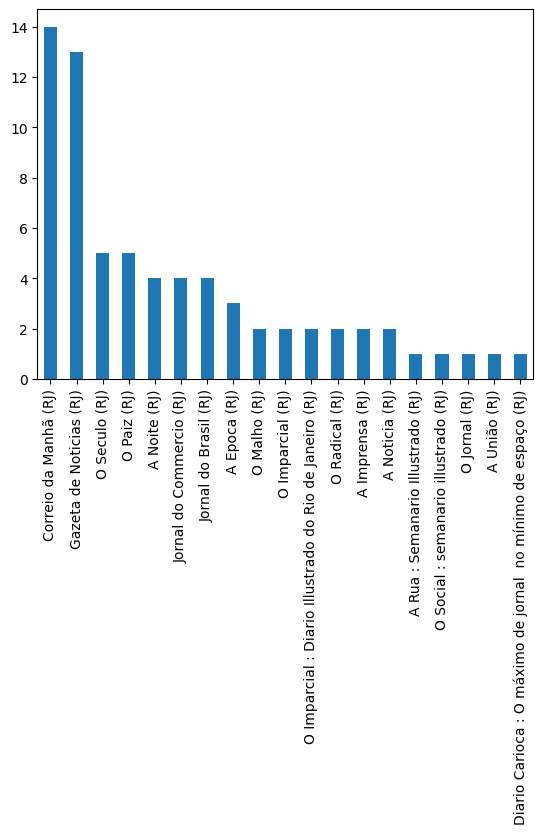

In [108]:
# plot a bar chart of column 'Ano' and 'Acervo'
df_hdb['Acervo'].value_counts().plot(kind='bar')


In [109]:
# filter by 'Ano'
df_hdb.filter(items=['Ano', 'Acervo'])\
    .groupby(['Ano', 'Acervo'])\
    .size()
    

Ano   Acervo                                                       
1904  Gazeta de Noticias (RJ)                                          1
1905  A Noticia (RJ)                                                   1
      A União (RJ)                                                     1
      Gazeta de Noticias (RJ)                                          3
1906  Correio da Manhã (RJ)                                            1
1907  O Seculo (RJ)                                                    1
1908  Jornal do Brasil (RJ)                                            1
      O Malho (RJ)                                                     1
1909  Correio da Manhã (RJ)                                            3
      Gazeta de Noticias (RJ)                                          4
      Jornal do Brasil (RJ)                                            2
      O Paiz (RJ)                                                      1
      O Seculo (RJ)                                     

In [110]:
# filter by 'Ano' between 1901 and 1940
df2 = df_hdb.filter(items=['Ano', 'Acervo'])\
          .query('Ano > 1901 and Ano < 1940')\
              

In [121]:
df2

,Ano,Acervo
0,1908,O Malho (RJ)
1,1911,O Malho (RJ)
2,1910,Correio da Manhã (RJ)
3,1910,Correio da Manhã (RJ)
4,1910,Correio da Manhã (RJ)
...,...,...
63,1909,Correio da Manhã (RJ)
64,1939,A Noite (RJ)
65,1939,A Noite (RJ)
66,1915,O Imparcial : Diario Illustrado do Rio de Jane...


In [113]:
df2.sort_values(by='Ano', ascending=True)

,Ano,Acervo
9,1904,Gazeta de Noticias (RJ)
12,1905,Gazeta de Noticias (RJ)
11,1905,Gazeta de Noticias (RJ)
43,1905,A Noticia (RJ)
10,1905,Gazeta de Noticias (RJ)
...,...,...
50,1939,O Radical (RJ)
58,1939,Correio da Manhã (RJ)
49,1939,O Radical (RJ)
64,1939,A Noite (RJ)


<Axes: >

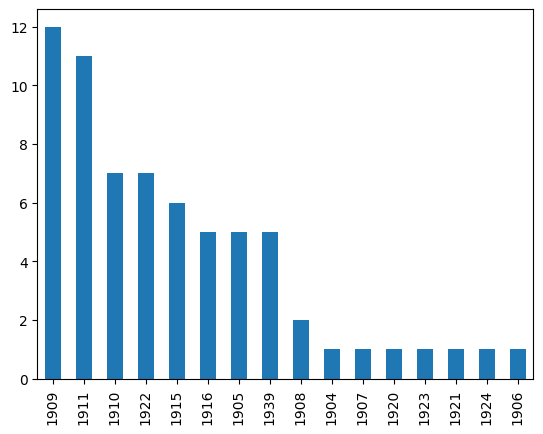

In [119]:
# contar anos com maior frequência e  mostrar num gráfico
df2['Ano'].value_counts().plot(kind='bar')

<Axes: >

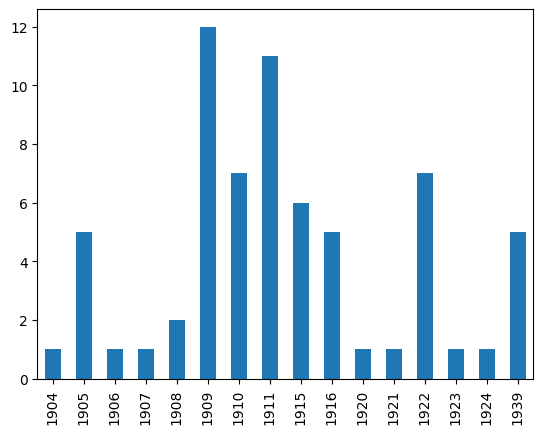

In [120]:
# contar anos com maior frequencia e  mostrar num grafico, ordenando por ano
df2['Ano'].value_counts().sort_index().plot(kind='bar')


<Axes: >

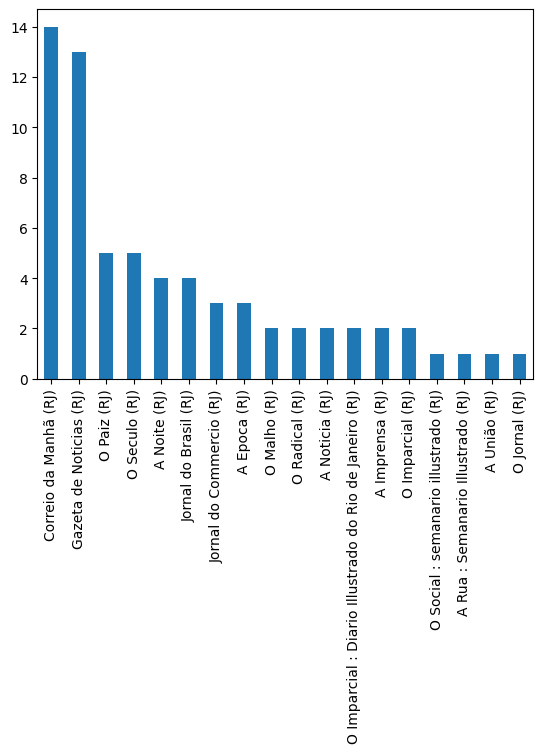

In [122]:
df2['Acervo'].value_counts().plot(kind='bar')

---

[Próximo →](dia4.ipynb)

[← Anterior](dia2.md)

[↑ Início](./README.md)